# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559686 sha256=cbab2af80cadbadf8ff528635971cdefaae31d38c0cecbe5fe2d2cbe3de81b6a
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\d9\dd\68\8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys01 import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | porto murtinho
Processing Record 2 of Set 1 | avera
Processing Record 3 of Set 1 | los llanos de aridane
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | padang
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | saint-georges
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | male
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | izazi
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | port-gentil
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | visnes
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | pitimbu
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 | tri

Processing Record 35 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 4 | prieska
Processing Record 37 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 38 of Set 4 | areosa
Processing Record 39 of Set 4 | saskylakh
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | surubim
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | san carlos
Processing Record 44 of Set 4 | norman wells
Processing Record 45 of Set 4 | kununurra
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | esperance
Processing Record 48 of Set 4 | butaritari
Processing Record 49 of Set 4 | wachtersbach
Processing Record 0 of Set 5 | eenhana
Processing Record 1 of Set 5 | tiksi
Processing Record 2 of Set 5 | ukiah
Processing Record 3 of Set 5 | grand gaube
Processing Record 4 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 5 | east wenatchee bench
Processing Record 6 of Set

Processing Record 28 of Set 8 | hihifo
City not found. Skipping...
Processing Record 29 of Set 8 | hami
Processing Record 30 of Set 8 | dasoguz
Processing Record 31 of Set 8 | olpad
Processing Record 32 of Set 8 | caravelas
Processing Record 33 of Set 8 | lorengau
Processing Record 34 of Set 8 | katherine
Processing Record 35 of Set 8 | faya
Processing Record 36 of Set 8 | gigmoto
Processing Record 37 of Set 8 | severomuysk
Processing Record 38 of Set 8 | wuhu
Processing Record 39 of Set 8 | acapulco
Processing Record 40 of Set 8 | sal rei
Processing Record 41 of Set 8 | port lincoln
Processing Record 42 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 8 | lasa
Processing Record 44 of Set 8 | ilulissat
Processing Record 45 of Set 8 | lavrentiya
Processing Record 46 of Set 8 | gwanda
Processing Record 47 of Set 8 | korla
Processing Record 48 of Set 8 | leh
Processing Record 49 of Set 8 | daru
Processing Record 0 of Set 9 | saint-pierre
Processing Record 1 of S

Processing Record 15 of Set 12 | lagoa
Processing Record 16 of Set 12 | san juan de opoa
Processing Record 17 of Set 12 | galbshtadt
Processing Record 18 of Set 12 | sompeta
Processing Record 19 of Set 12 | labuhan
Processing Record 20 of Set 12 | port hardy
Processing Record 21 of Set 12 | eidsvag
Processing Record 22 of Set 12 | ialibu
Processing Record 23 of Set 12 | north bend
Processing Record 24 of Set 12 | panguipulli
Processing Record 25 of Set 12 | aykhal
Processing Record 26 of Set 12 | khonuu
City not found. Skipping...
Processing Record 27 of Set 12 | caucaia
Processing Record 28 of Set 12 | gidam
Processing Record 29 of Set 12 | hobyo
Processing Record 30 of Set 12 | waipawa
Processing Record 31 of Set 12 | tessalit
Processing Record 32 of Set 12 | dandong
Processing Record 33 of Set 12 | taoudenni
Processing Record 34 of Set 12 | tonantins
Processing Record 35 of Set 12 | astana
Processing Record 36 of Set 12 | envira
Processing Record 37 of Set 12 | luwuk
Processing Reco

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,porto murtinho,-21.6989,-57.8825,27.73,77,99,1.32,BR,1679167771
1,avera,33.1940,-82.5271,14.39,30,93,7.12,US,1679167771
2,los llanos de aridane,28.6585,-17.9182,17.86,76,75,7.15,ES,1679167771
3,mataura,-46.1927,168.8643,9.18,74,6,1.78,NZ,1679167772
4,padang,-0.9492,100.3543,25.27,88,100,1.76,ID,1679167772


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,porto murtinho,-21.6989,-57.8825,27.73,77,99,1.32,BR,1679167771
1,avera,33.1940,-82.5271,14.39,30,93,7.12,US,1679167771
2,los llanos de aridane,28.6585,-17.9182,17.86,76,75,7.15,ES,1679167771
3,mataura,-46.1927,168.8643,9.18,74,6,1.78,NZ,1679167772
4,padang,-0.9492,100.3543,25.27,88,100,1.76,ID,1679167772


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

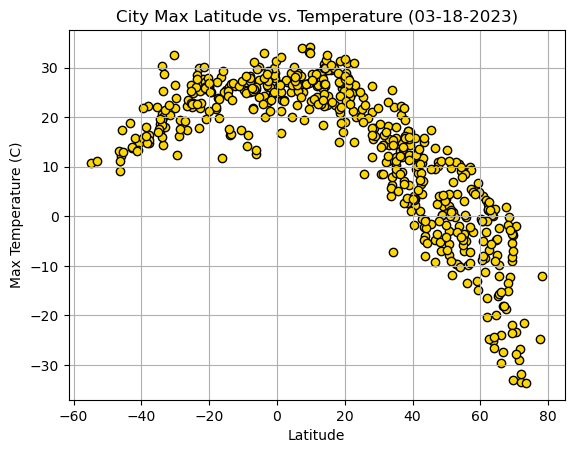

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="gold",
    edgecolor="black",
    linewidths=1,
    marker="o", 
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

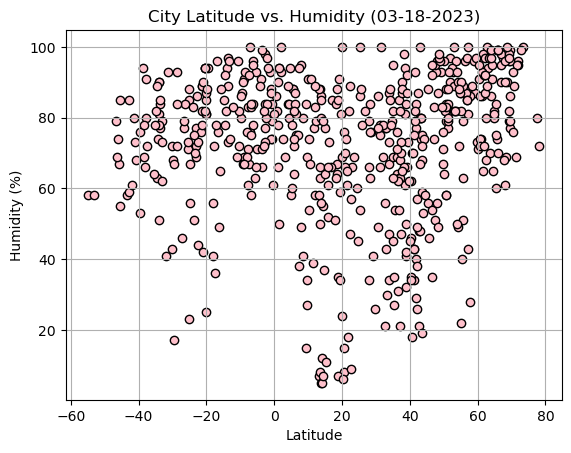

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="pink",
    edgecolor="black",
    linewidths=1,
    marker="o", 
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

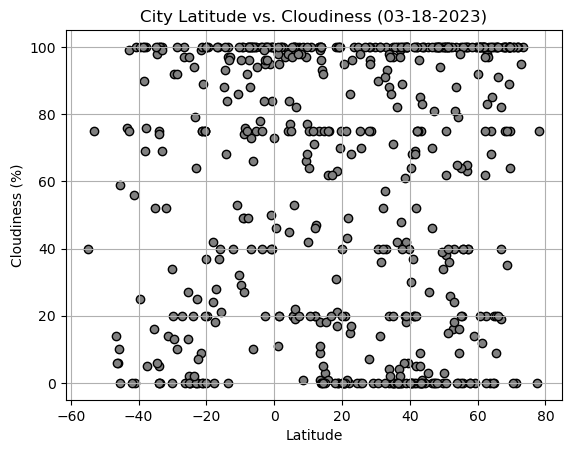

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="gray",
    edgecolor="black",
    linewidths=1,
    marker="o", 
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

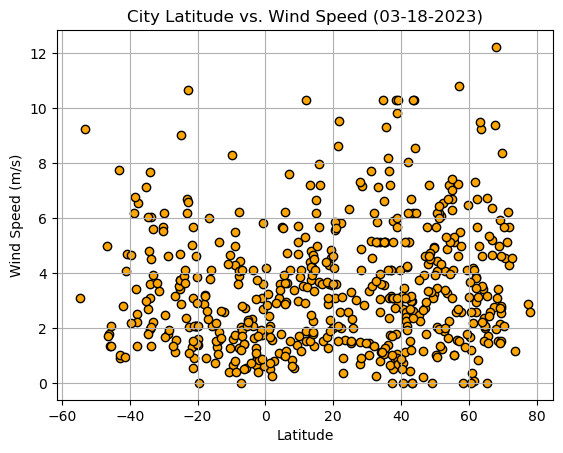

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    color="orange",
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avera,33.1940,-82.5271,14.39,30,93,7.12,US,1679167771
2,los llanos de aridane,28.6585,-17.9182,17.86,76,75,7.15,ES,1679167771
6,saint-georges,12.0564,-61.7485,28.82,58,20,10.29,GD,1679167772
7,tasiilaq,65.6145,-37.6368,-9.91,74,100,1.70,GL,1679167773
9,male,4.1748,73.5089,28.97,84,75,3.09,MV,1679167773


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,porto murtinho,-21.6989,-57.8825,27.73,77,99,1.32,BR,1679167771
3,mataura,-46.1927,168.8643,9.18,74,6,1.78,NZ,1679167772
4,padang,-0.9492,100.3543,25.27,88,100,1.76,ID,1679167772
5,ushuaia,-54.8000,-68.3000,10.81,58,40,3.09,AR,1679167772
8,arraial do cabo,-22.9661,-42.0278,29.98,69,0,6.17,BR,1679167773


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7827517323754815


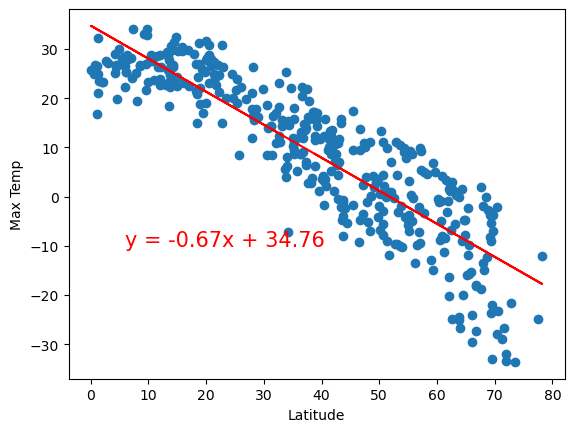

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))

The r-value is: 0.39152515243954167


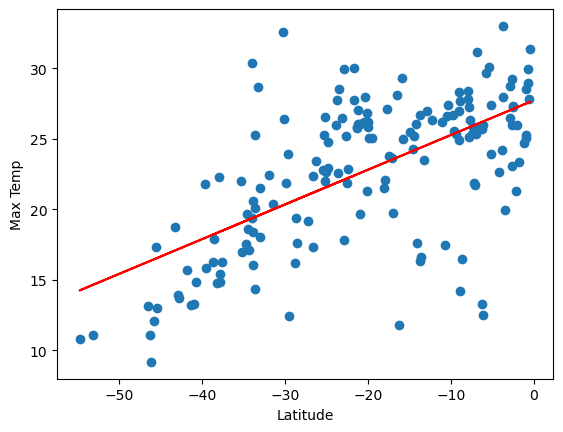

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08928804798058845


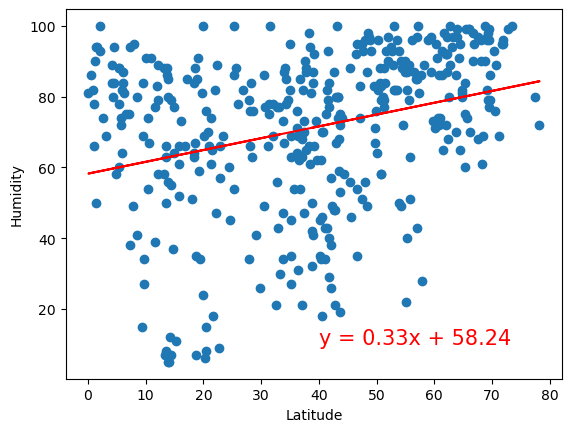

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.0690517933092237


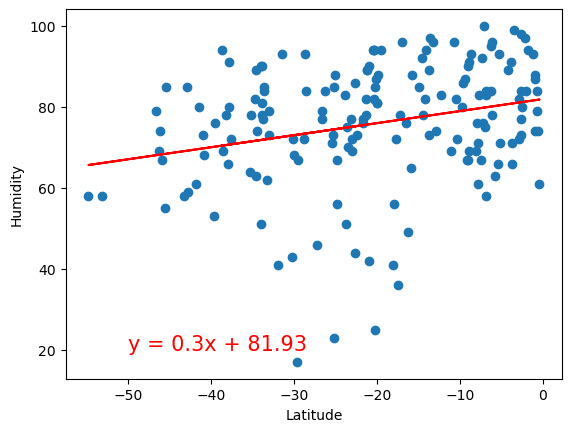

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.006433763522554113


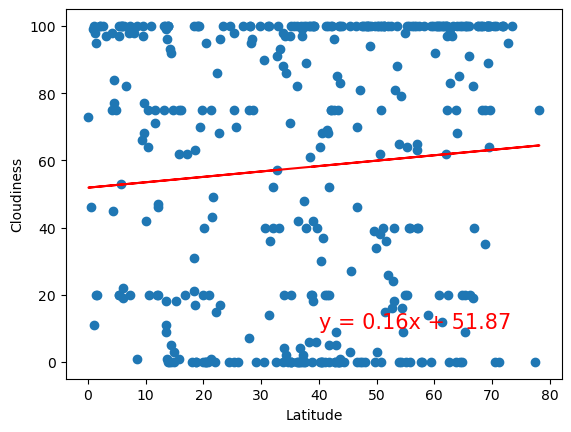

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.09738056876119044


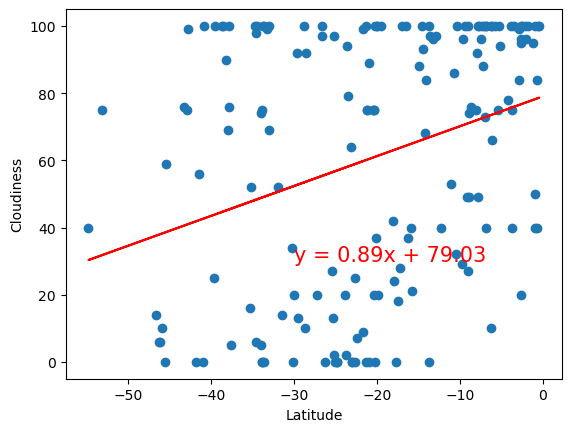

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00900023642004107


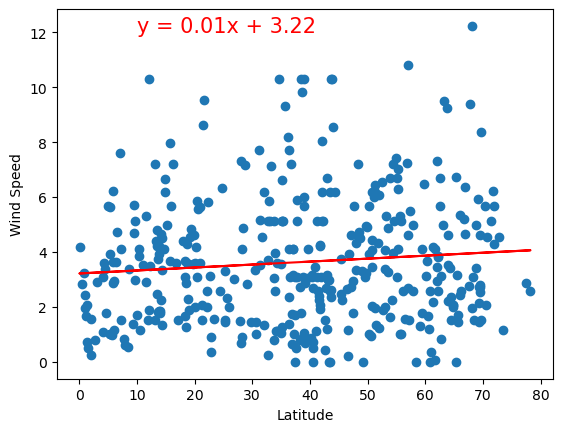

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.08097972865755636


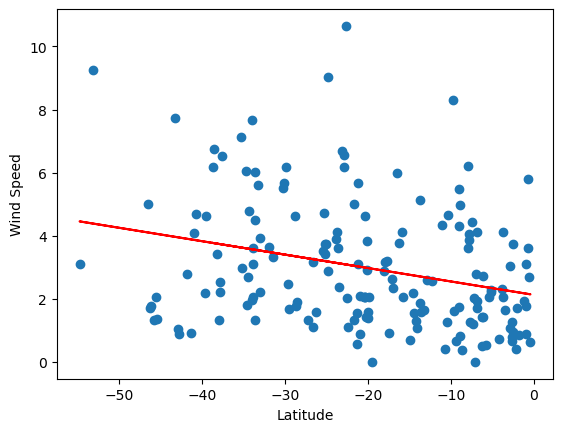

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.